# 🌦️ Ulykkesanalyse etter værforhold
Denne analysen undersøker hvordan antall trafikkulykker varierer med værforhold, basert på datasettene fra Statens vegvesen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Ulykker_med_værforhold.csv", encoding="ISO-8859-1", delimiter=";")
df.columns = df.columns.str.strip().str.replace("\n", "")
df.rename(columns={"Kommune": "Kommune", "Måned": "Måned", "År": "År"}, inplace=True)
weather_cols = [col for col in df.columns if col not in ["Kommune", "Måned", "År"]]
df["År"] = df["År"].fillna(0).astype(int)


## 🔹 Analyse 1: Totalt antall ulykker per værtype

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_816\4172488627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Værtype", y="Antall ulykker", palette="crest")


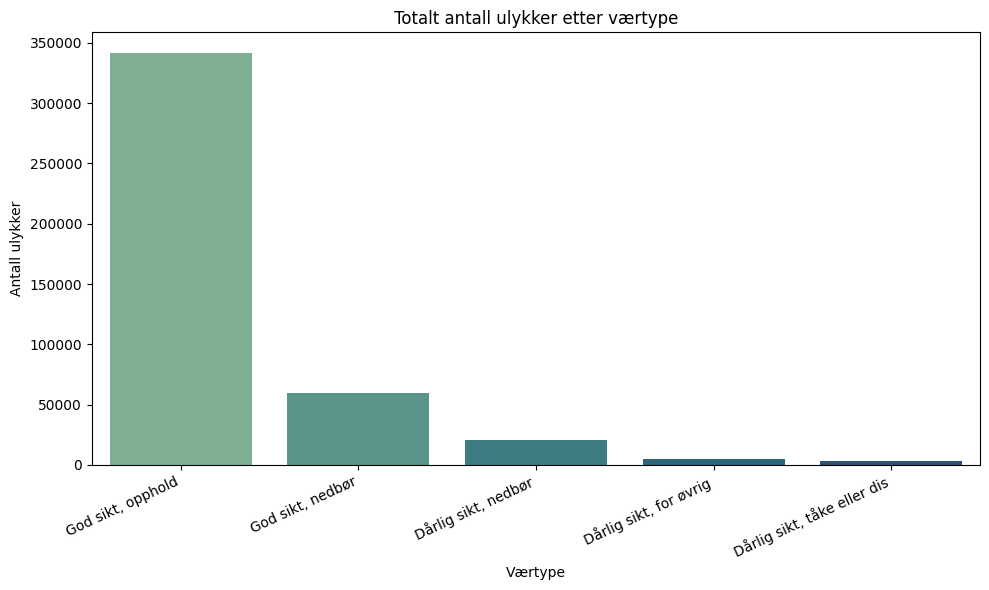

In [2]:
summary = df[weather_cols].sum().sort_values(ascending=False)
summary_df = summary.reset_index()
summary_df.columns = ["Værtype", "Antall ulykker"]

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Værtype", y="Antall ulykker", palette="crest")
plt.title("Totalt antall ulykker etter værtype")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


### 🔍 Analyse 1: Totalt antall ulykker per værtype

**Observasjon:**
- Klart flest ulykker skjer under **"God sikt, opphold"**.
- Deretter kommer **"God sikt, nedbør"** og **"Dårlig sikt, nedbør"**.

**Tolkning:**
- Det er flere ulykker i oppholdsvær fordi **flere biler er på veien da**.
- Dårlig sikt i nedbør eller tåke gir færre ulykker totalt, men kan ha høyere alvorlighetsgrad – og bør undersøkes nærmere.


## 🔹 Analyse 2: Ulykker per måned og værtype

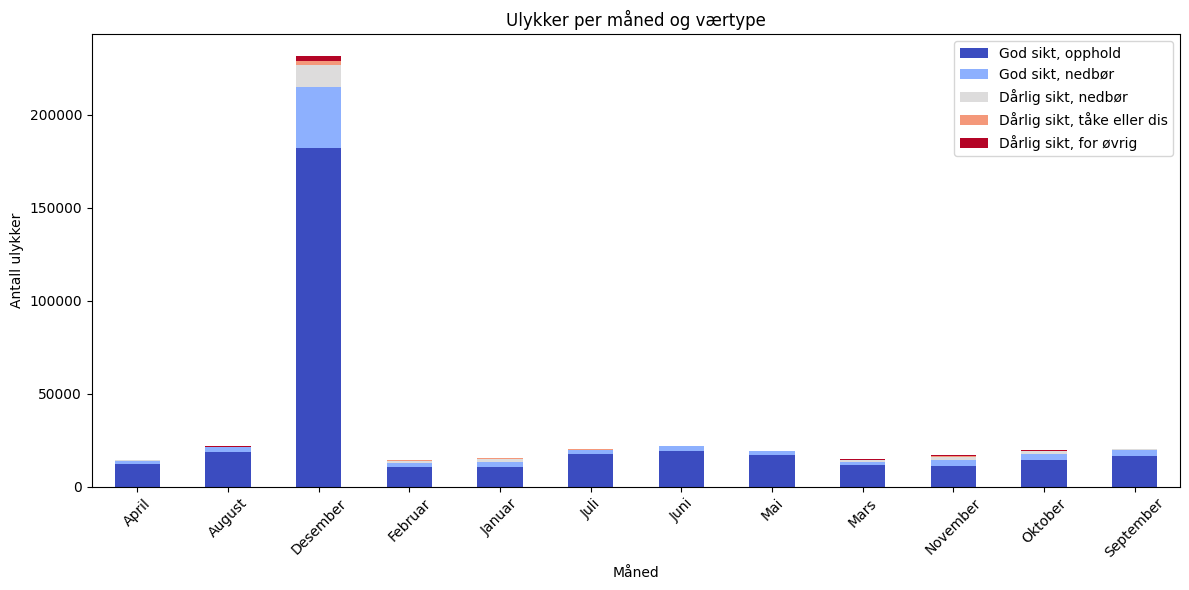

In [3]:
monthly = df.groupby("Måned")[weather_cols].sum()
monthly.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Ulykker per måned og værtype")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔍 Analyse 2: Ulykker per måned og værtype

**Observasjon:**
- **Desember og januar** har en klar topp i ulykker – også under god sikt!
- Nedbør og dårlig sikt opptrer oftere i høst- og vintermånedene.

**Tolkning:**
- Det høye antallet ulykker i desember skyldes trolig:
  - Kombinasjon av **høyt aktivitetsnivå** (jul, handel, ferie) og **vanskelige kjøreforhold**.
  - Økt mørke, glatte veier og varierende sikt.
- Selv når sikten er god, kan veibanen være **glatt, fuktig eller kald**, og føre til ulykker.
- Ulykker i vintermånedene indikerer at **trafikkmengde og føre** er kritiske faktorer.



## 🔹 Analyse 3: Utvikling over tid (1990–2023) per værtype

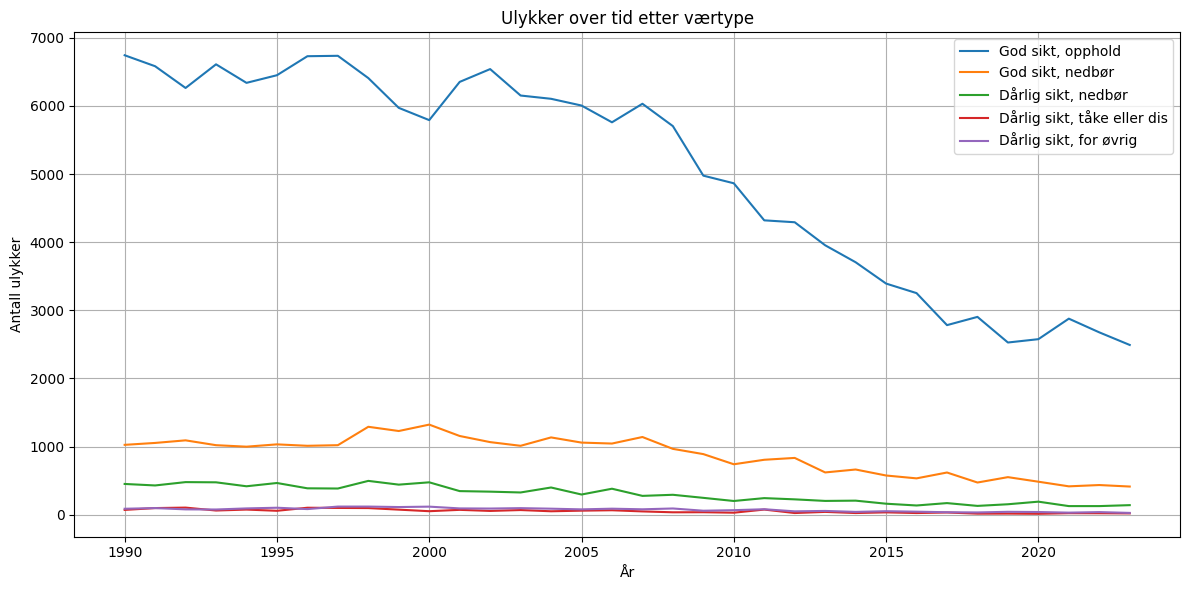

In [4]:
yearly = df[df["År"] >= 1990].groupby("År")[weather_cols].sum()
yearly.plot(figsize=(12, 6))
plt.title("Ulykker over tid etter værtype")
plt.ylabel("Antall ulykker")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Analyse 3: Utvikling over tid (1990–2023) per værtype

**Observasjon:**
- Ulykker i **"God sikt, opphold"** har vært høyest gjennom hele perioden.
- Det er relativt stabil utvikling, men variasjon finnes – særlig rundt 2010–2020.

**Tolkning:**
- Den markerte nedgangen i ulykker etter 2010 under gode siktforhold kan skyldes:
  - **Bedre førerstøttesystemer** (ABS, ESP, automatisk brems).
  - **Bedre veivedlikehold**, fartsgrenser og holdningskampanjer.
- At de fleste ulykker skjer under gode forhold tyder på at **føreratferd og trafikkmengde** spiller større rolle enn vær alene.
- Dårlige værtyper gir færre ulykker, men krever likevel tiltak pga. potensielt større alvorlighetsgrad.



## 🔹 Analyse 4: Sesongvis fordeling av ulykker per værtype

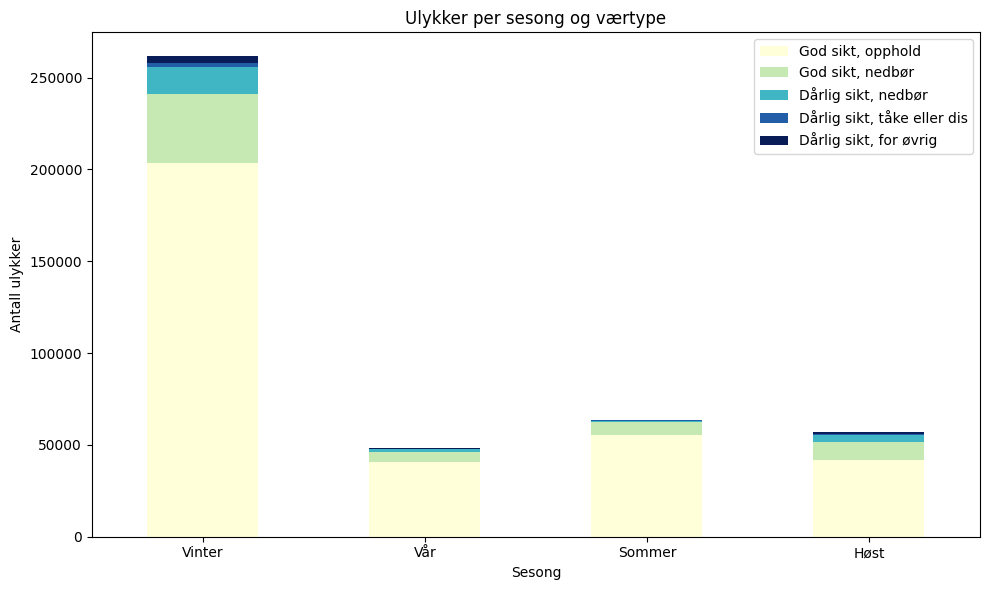

In [10]:
måned_sesong = {
    "Januar": "Vinter", "Februar": "Vinter", "Desember": "Vinter",
    "Mars": "Vår", "April": "Vår", "Mai": "Vår",
    "Juni": "Sommer", "Juli": "Sommer", "August": "Sommer",
    "September": "Høst", "Oktober": "Høst", "November": "Høst"
}

df["Sesong"] = df["Måned"].map(måned_sesong)
sesong_data = df.groupby("Sesong")[weather_cols].sum().reindex(["Vinter", "Vår", "Sommer", "Høst"])

sesong_data.plot(kind="bar", stacked=True, figsize=(10,6), colormap="YlGnBu")
plt.title("Ulykker per sesong og værtype")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 🔍 Analyse 4: Sesongvis fordeling av ulykker per værtype

**Observasjon:**
- **Vinter** dominerer antall ulykker under både god og dårlig sikt.
- **Høst og vår** har noe høyere andel dårlig sikt + nedbør.

**Tolkning:**
- Vinteren gir både mørketid og vanskelig føre – men folk kjører fortsatt mye.
- Dårlig sikt kombinert med glatt vei gjør vinteren og høsten ekstra risikofylt.


## 🔹 Analyse 5: Topp 10 kommuner med flest værrelaterte ulykker

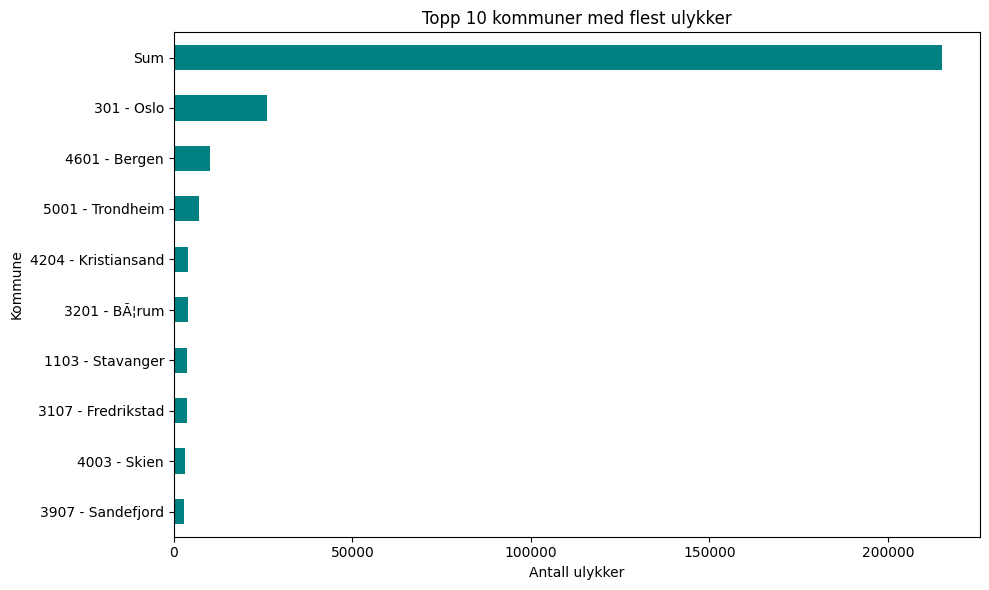

In [7]:
df["Totalt"] = df[weather_cols].sum(axis=1)
kommuner = df.groupby("Kommune")["Totalt"].sum().sort_values(ascending=False).head(10)

kommuner.plot(kind="barh", figsize=(10, 6), color="teal")
plt.title("Topp 10 kommuner med flest ulykker")
plt.xlabel("Antall ulykker")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 🔍 Analyse 5: Topp 10 kommuner med flest værrelaterte ulykker

**Observasjon:**
- **Oslo** har klart flest ulykker, etterfulgt av Bergen, Trondheim og Kristiansand.

**Tolkning:**
- Storbykommuner har **mer trafikk, flere myke trafikanter og komplekse veimiljøer**.
- Dette gjør dem mer utsatt for værrelaterte ulykker, uavhengig av sikt og nedbør.


## 🔹 Analyse 6: Andel ulykker med god vs. dårlig sikt

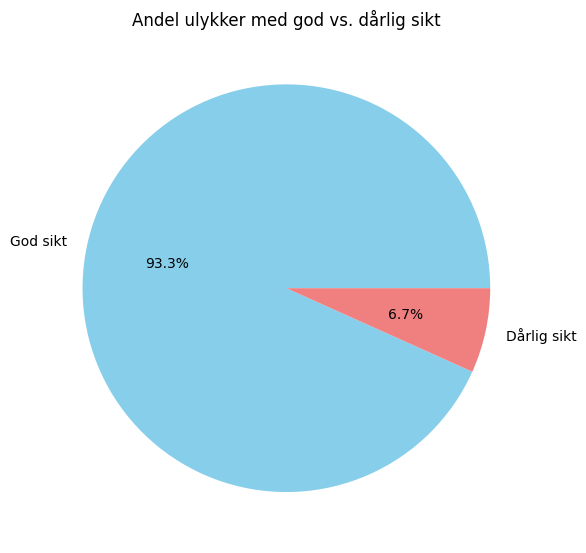

In [8]:
df["God sikt"] = df["God sikt, opphold"] + df["God sikt, nedbør"]
df["Dårlig sikt"] = df["Dårlig sikt, nedbør"] + df["Dårlig sikt, tåke eller dis"] + df["Dårlig sikt, for øvrig"]

sikt = df[["God sikt", "Dårlig sikt"]].sum()
sikt.plot(kind="pie", autopct="%.1f%%", figsize=(6,6), colors=["skyblue", "lightcoral"])
plt.title("Andel ulykker med god vs. dårlig sikt")
plt.ylabel("")
plt.tight_layout()
plt.show()


### 🔍 Analyse 6: Andel ulykker med god vs. dårlig sikt

**Observasjon:**
- **God sikt** står for størstedelen av ulykkene (~93,3%).
- **Dårlig sikt** utgjør omtrent 6,7%.

**Tolkning:**
- Dette tyder på at **menneskelig atferd og trafikkmengde** er større risikofaktorer enn bare sikt.
- Likevel: Dårlig sikt kan gjøre ulykker mer alvorlige – bør undersøkes videre.


## 🔹 Analyse 7: Dårlig sikt fordelt på sesong

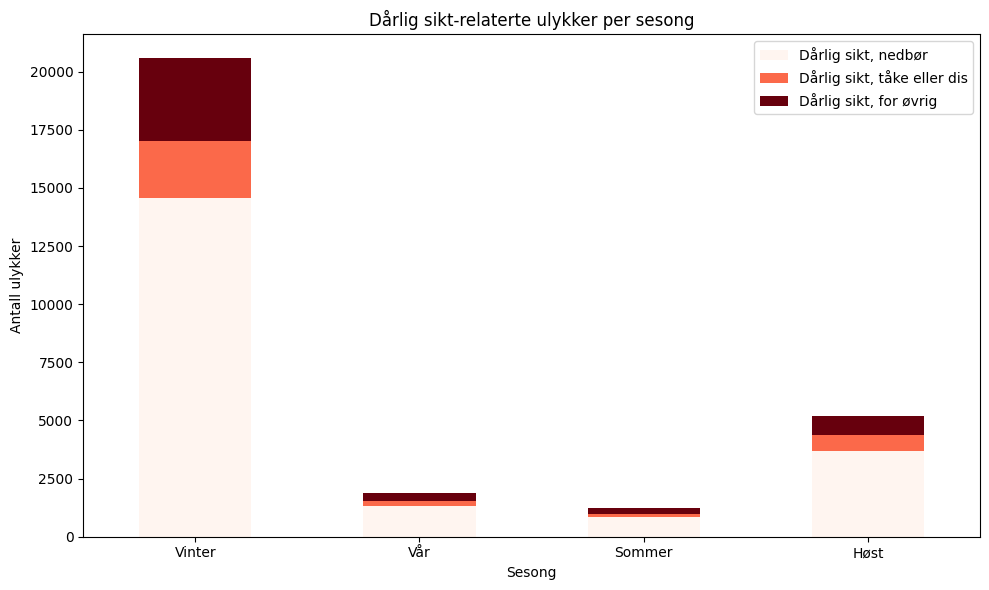

In [11]:
dårlig_sikt_cols = ["Dårlig sikt, nedbør", "Dårlig sikt, tåke eller dis", "Dårlig sikt, for øvrig"]
dårlig_per_sesong = df.groupby("Sesong")[dårlig_sikt_cols].sum().reindex(["Vinter", "Vår", "Sommer", "Høst"])

dårlig_per_sesong.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Reds")
plt.title("Dårlig sikt-relaterte ulykker per sesong")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 🔍 Analyse 7: Dårlig sikt fordelt på sesong

**Observasjon:**
- Dårlig sikt (tåke, dis, nedbør) skjer oftest i **vinter og høst**.
- **Våren og sommeren** har betydelig færre ulykker under dårlig sikt.

**Tolkning:**
- Dårlig vær og mørketid gjør høst og vinter særlig krevende for førere.
- Dette kan begrunne behovet for **målrettede tiltak** i mørke og fuktige perioder.


## 🧾 Konklusjon

### 📊 Oppsummering:
- **Flest ulykker skjer i oppholdsvær med god sikt**, trolig fordi trafikkmengden da er høyest.
- **Desember** skiller seg dramatisk ut med ekstremt mange ulykker – på tvers av alle værtyper.
- **Dårlig sikt** (som tåke, dis eller nedbør) utgjør en betydelig andel av ulykkene i høst og vinter, selv om de ikke dominerer i antall.
- Storbykommuner som **Oslo, Bergen og Trondheim** har flest registrerte værrelaterte ulykker.
- Over tid har **ulykker under gode siktforhold gått betydelig ned**, særlig etter 2010 – noe som kan reflektere bedre teknologi og sikkerhetstiltak.

### 🔍 Tolkninger:
- **Godt vær betyr ikke trygge forhold** – mange ulykker skjer fordi folk slapper mer av, eller fordi flere er på veien.
- **Desember-effekten** skyldes kombinasjonen av høyt aktivitetsnivå, mørke, krevende føre og økt risikoatferd.
- **Nullføre og nedbør** gir økt risiko i høst og vinter, og dårlig sikt forsterker denne risikoen.
- Den stabile ulykkesraten i dårlig vær antyder at sjåfører er mer forsiktige under krevende forhold – men konsekvensene kan være mer alvorlige.

### 📌 Anbefalinger:
- **Tiltak bør målrettes sesongmessig**, spesielt mot desember og vinteren generelt.
- **Fokuserte kampanjer i oppholdsvær** kan være mer effektive enn å bare advare om glatte veier.
- **Forbedret belysning, friksjonsvarsling og vintervedlikehold** bør prioriteres i utsatte kommuner.
- Data viser at sikkerhetsteknologi og moderne biler **har effekt** – støtte for videre insentivordninger.

> Risiko oppstår ikke bare når forholdene er dårlige – men når folk **ikke tilpasser atferd til forholdene**.